## 0) Import

In [139]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline

## 1) Data

In [72]:
df = pd.read_csv('data/Country-data.csv')

In [73]:
# country_mapping = {
#     'Dem. Rep. Congo': 'Congo, Dem. Rep.',
#     'Congo': 'Congo, Rep.',
#     'Côte d\'Ivoire': "Cote d'Ivoire",
#     'South Korea': 'Korea, South',
#     'United States': 'United States of America',
#     'United Kingdom': 'United Kingdom', 
# }

In [74]:
# df['country'] = df['country'].map(country_mapping).fillna(df['country'])
# df

In [75]:
df.set_index("country", inplace=True)
X = df.values

## 2) Clustering

### 2.1) KMeans

In [76]:
pipeline_kmeans = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

In [77]:
pipeline_kmeans.fit(X)

cluster_labels = pipeline_kmeans.predict(X)

c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [78]:
df_clustered_kmeans = df.copy()
df_clustered_kmeans['Cluster_kmeans'] = cluster_labels

df_clustered_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_kmeans
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


### 2.2) Agglomerative Clustering

In [79]:
pipeline_agglomerative = Pipeline([
    ('scaler', StandardScaler()),
    ('agglomerative', AgglomerativeClustering(n_clusters=3))
])

In [80]:
cluster_labels_agglomerative = pipeline_agglomerative.fit_predict(X)

In [81]:
df_clustered_agglomerative = df.copy()
df_clustered_agglomerative['Cluster_AggClu'] = cluster_labels_agglomerative
df_clustered_agglomerative.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_AggClu
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


### 2.3) DBScan

In [167]:
# DBSCAN
pipeline_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dbscan', DBSCAN(eps=0.5, min_samples=10))
])

In [168]:
cluster_labels_dbscan = pipeline_dbscan.fit_predict(X)

In [169]:
df_clustered_dbscan = df.copy()
df_clustered_dbscan['Cluster_dbscan'] = cluster_labels_dbscan
df_clustered_dbscan.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_dbscan
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-1
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_9760\2810405069.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


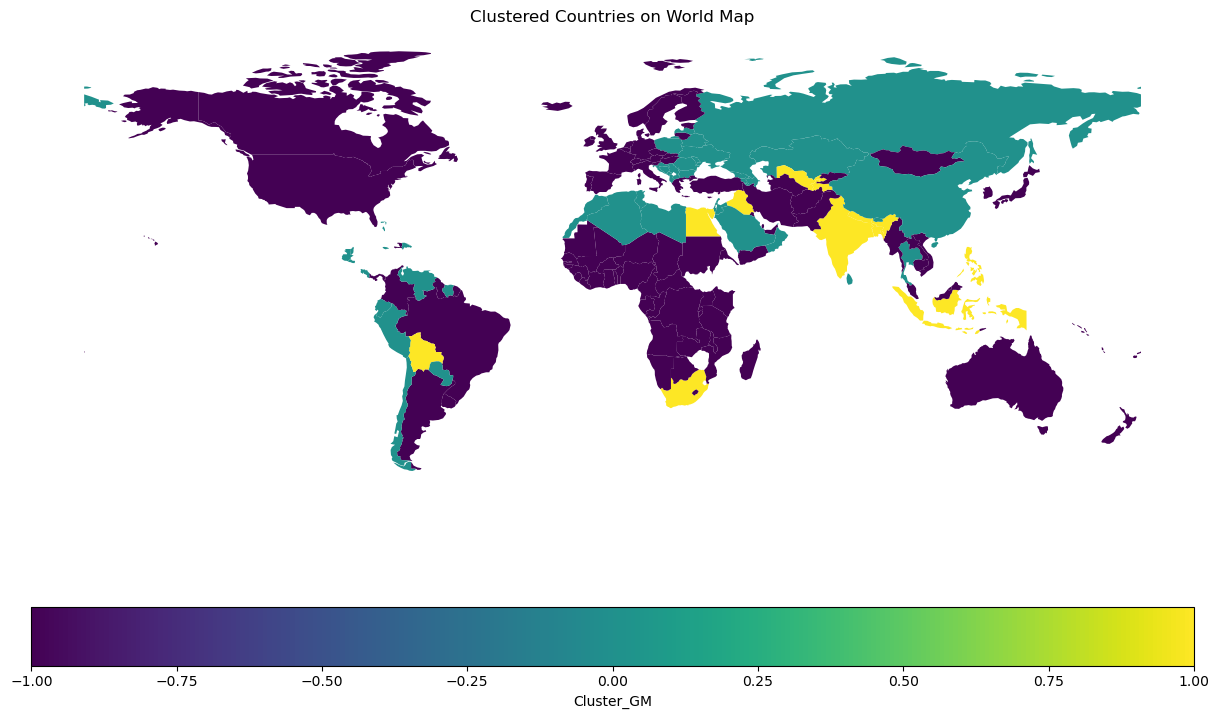

In [170]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with country data based on country names
world = world.merge(df_clustered_dbscan, left_on='name', right_index=True)

# Plot choropleth map with cluster colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster_dbscan', ax=ax, legend=True, cmap='viridis', 
           legend_kwds={'label': 'Cluster_GM', 'orientation': 'horizontal'})
ax.set_title('Clustered Countries on World Map')
ax.set_axis_off()  # Turn off axis
plt.show()


### 2.4) Gaussian Mixture

In [85]:
pipeline_gmm = Pipeline([
    ('scaler', StandardScaler()),
    ('gmm', GaussianMixture(n_components=3, random_state=42))
])

In [86]:
cluster_labels_gmm = pipeline_gmm.fit_predict(X)

c:\Users\Carlos Andres Cortes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
df_clustered_gmm = df.copy()

df_clustered_gmm['Cluster_GM'] = cluster_labels_gmm

df_clustered_gmm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_GM
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


## Results

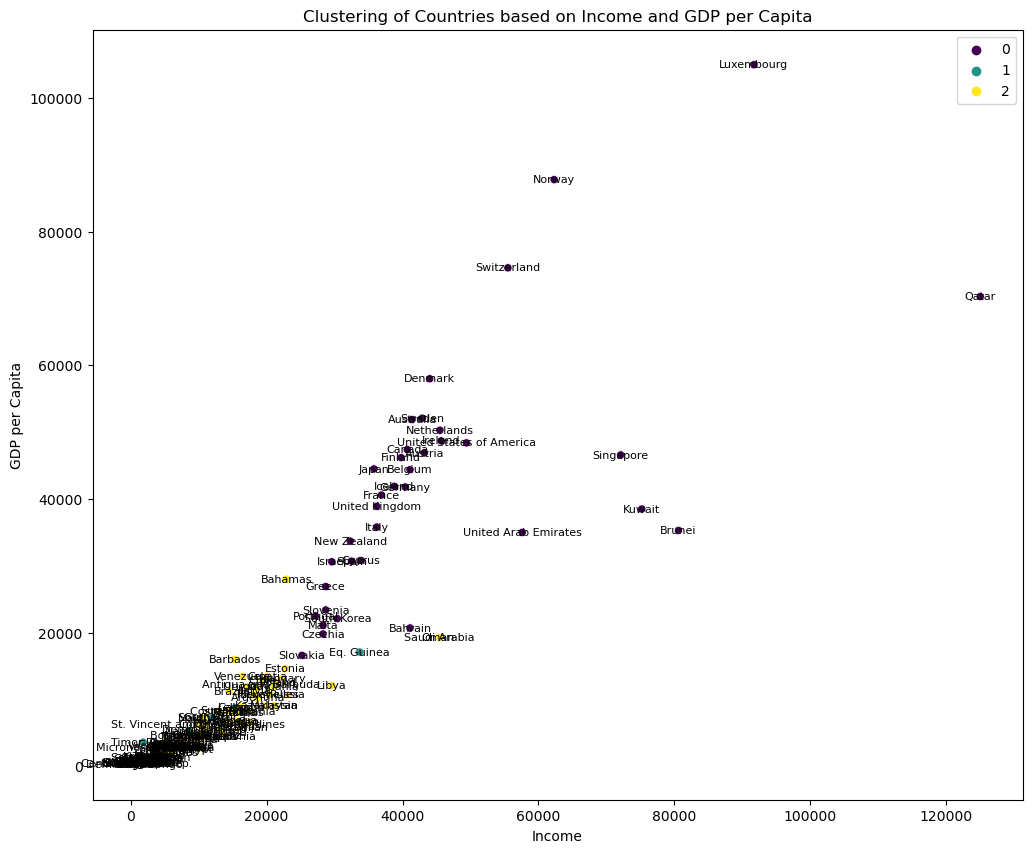

In [88]:
plt.figure(figsize=(12, 10))
scatter = sns.scatterplot(x='income', y='gdpp', hue=cluster_labels, palette='viridis', legend='full', data=df_clustered)

for country, (x, y) in df_clustered[['income', 'gdpp']].iterrows():
    scatter.text(x, y, country, fontsize=8, ha='center', va='center')

plt.title('Clustering of Countries based on Income and GDP per Capita')
plt.xlabel('Income')
plt.ylabel('GDP per Capita')
plt.show()

In [89]:
for cluster_id in df_clustered['Cluster'].unique():
    cluster_countries = df_clustered[df_clustered['Cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}:")
    print(cluster_countries)
    print()

Cluster 1:
['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Rep.', 'Chad', 'Comoros', 'Dem. Rep. Congo', 'Congo', "Côte d'Ivoire", 'Eq. Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Laos', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']

Cluster 2:
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India', 'In

C:\Users\Carlos Andres Cortes\AppData\Local\Temp\ipykernel_9760\2810405069.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


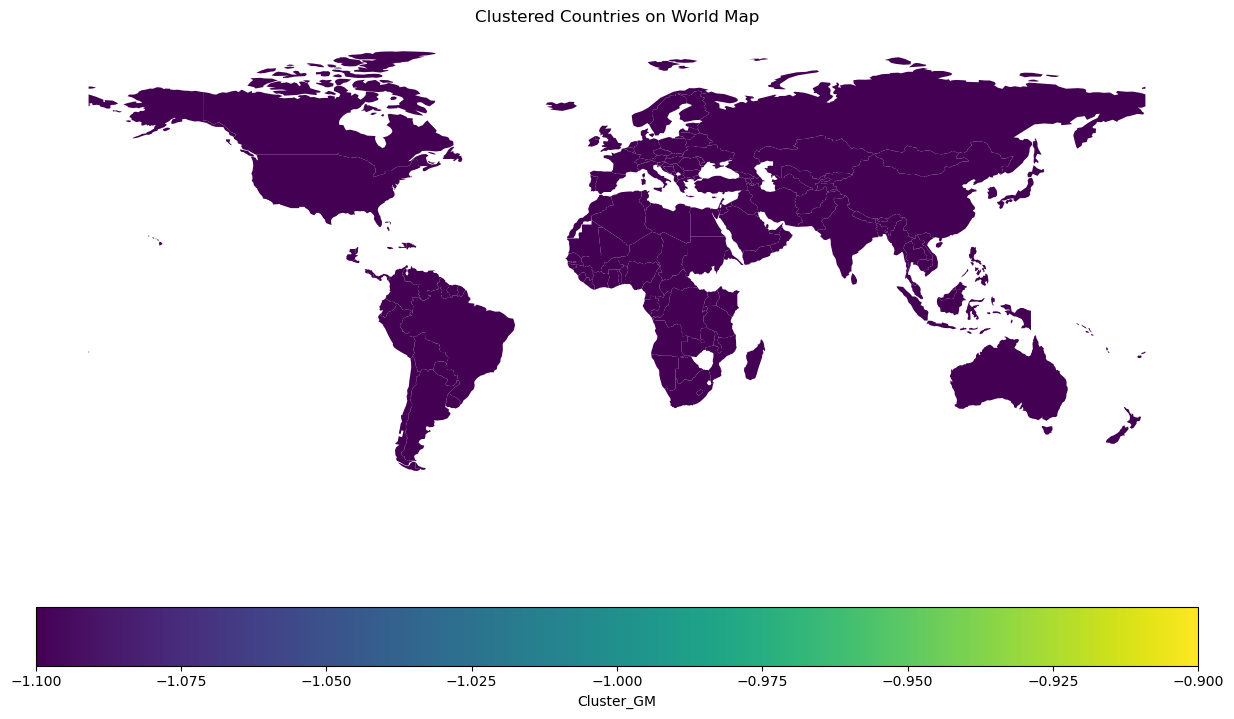

In [94]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with country data based on country names
world = world.merge(df_clustered_dbscan, left_on='name', right_index=True)

# Plot choropleth map with cluster colors
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='Cluster_dbscan', ax=ax, legend=True, cmap='viridis', 
           legend_kwds={'label': 'Cluster_GM', 'orientation': 'horizontal'})
ax.set_title('Clustered Countries on World Map')
ax.set_axis_off()  # Turn off axis
plt.show()
